In [1]:
import subprocess
import os
#import netcdf4
import netCDF4
import numpy as np
#import glob
#import time
import matplotlib.pyplot as plt
#import copy
import xarray as xr
#from datetime import datetime, timedelta 
#from ocean_c_lab_tools import *
#from celluloid import Camera 
#import PyCO2SYS as csys
#import seawater as sw
import xesmf as xe

In [2]:
month=7

#x=xr.open_dataset('/global/cfs/cdirs/m4632/uheede/Cerra/cerra_2020_leadtime1_202002.nc',decode_times=False)
x=xr.open_dataset('/global/cfs/cdirs/m4632/uheede/Cerra/cerra_2020_leadtime1_ex_2020'+str(month)+'.nc',decode_times=False)
r2=x['r2']
t2m=x['t2m']
x=xr.open_dataset('/global/cfs/cdirs/m4632/uheede/Cerra/cerra_2020_leadtime1_20200'+str(month)+'.nc',decode_times=False)
skt=x['skt']
ssr=x['ssr']
strd=x['strd']
tp=x['tp']

ws=x['si10']
wd=x['wdir10']

u10=ws*np.cos(np.deg2rad(wd))
v10=ws*np.sin(np.deg2rad(wd))

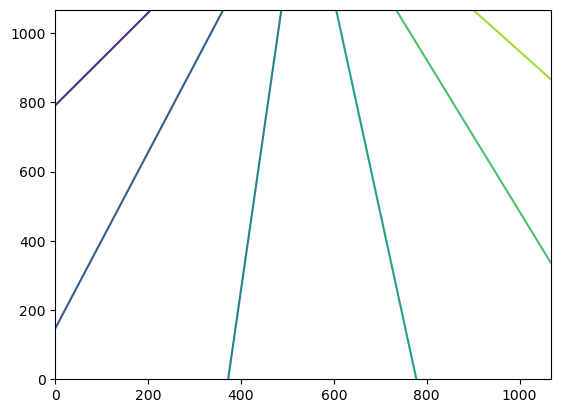

In [3]:
plt.contour(x.longitude.load())

In [4]:
#lon_min=(310)
lon_min=(x.longitude.min().values)
#lon_max=(x.longitude.max().values)
lon_max=(0)
lon_step=((lon_max-lon_min)/len(x.x))

lat_min=(x.latitude.min().values)
lat_max=(x.latitude.max().values)
lat_step=((lat_max-lat_min)/len(x.y))

In [5]:
ds_out = xr.Dataset(
    {
        "lon": (["lon"], np.arange(lon_min, lon_max, lon_step), {"units": "degrees_north"}),
        "lat": (["lat"], np.arange(lat_min, lat_max, lat_step), {"units": "degrees_east"}),
    }
)

In [6]:
regridder = xe.Regridder(x, ds_out, "bilinear")
r2_regrid=regridder(r2)
skt_regrid=regridder(skt)

ssr_regrid=regridder(ssr)
strd_regrid=regridder(strd)
t2m_regrid=regridder(t2m)
tp_regrid=regridder(tp)
u10_regrid=regridder(u10)
v10_regrid=regridder(v10)

In [7]:
r2_regrid.attrs['long name'] = '2 metre relative humidity'
r2_regrid=r2_regrid.reset_coords(names="heightAboveGround",drop=True)

skt_regrid.attrs['long name'] = 'Skin temperature'
skt_regrid=skt_regrid.reset_coords(names="heightAboveGround",drop=True)

ssr_regrid.attrs['long name'] = 'Surface net short-wave (solar) radiation'
ssr_regrid=ssr_regrid.reset_coords(names="heightAboveGround",drop=True)

strd_regrid.attrs['long name'] = 'Surface long-wave (thermal) radiation downwards'
strd_regrid=strd_regrid.reset_coords(names="heightAboveGround",drop=True)

u10_regrid.attrs['long name'] = '10 metre U wind component'
u10_regrid=u10_regrid.reset_coords(names="heightAboveGround",drop=True)

v10_regrid.attrs['long name'] = '10 metre V wind component'
v10_regrid=v10_regrid.reset_coords(names="heightAboveGround",drop=True)

t2m_regrid.attrs['long name'] = '2 metre temperature'
t2m_regrid=t2m_regrid.reset_coords(names="heightAboveGround",drop=True)

tp_regrid.attrs['long name'] = 'total precipitation'
tp_regrid=tp_regrid.reset_coords(names="heightAboveGround",drop=True)


In [8]:
cerra_2020_2 = xr.Dataset({
    'u10': u10_regrid.squeeze(),
    'v10': v10_regrid.squeeze(),
    't2m': t2m_regrid.squeeze(),
    'r2': r2_regrid.squeeze(),
    'sst': skt_regrid.squeeze(),
    'ssr': ssr_regrid.squeeze(),
    'strd': strd_regrid.squeeze(),
    'tp': tp_regrid.squeeze(),
    'time': x['time'],
    'longitude': u10_regrid.lon,
    'latitude': u10_regrid.lat,
    
})

In [9]:
cerra_2020_2.to_netcdf('/global/cfs/cdirs/m4632/uheede/Cerra/regrid/cerra_2020_0'+str(month)+'.nc')